### **Assignment 3: Predicting Ice Cream Sales from Temperature**

#### **Problem Statement**
The relationship between temperature and ice cream sales is often nonlinear, with sales typically increasing as the temperature rises, but at a diminishing rate. This model will use polynomial regression to predict ice cream sales based on temperature, capturing the nonlinear relationship between these variables.

#### **How the Model Will Help**
This model can help businesses or marketing teams in the ice cream industry plan their inventory and sales strategies based on weather forecasts, optimizing stock levels and maximizing sales during hot days.

#### **Data Description**
The dataset contains two columns:
- **temperature**: The temperature in degrees (e.g., Celsius or Fahrenheit).
- **ice_cream_sales**: The number of ice cream units sold at that particular temperature.

#### **Instructions**
1. **Load and Explore**: Load the dataset and plot `temperature` against `ice_cream_sales` to observe any nonlinear relationship.
2. **Feature Transformation**: Transform the `temperature` feature to polynomial terms (e.g., degree 2 or 3) to capture nonlinear trends.
3. **Model Training**: Split the data into training (80%) and testing (20%) sets, and train a polynomial regression model to predict `ice_cream_sales`.
4. **Visualization**: Plot the polynomial regression curve against the actual data points for visualization.



In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.compose import ColumnTransformer as ct
from sklearn.preprocessing import OneHotEncoder as oht
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 

In [75]:
data = pd.read_csv(r'C:\Users\Administrator\Documents\Data Science Bootcamp\Ice_cream selling data - Ice_cream selling data.csv')
data.head()


,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [76]:
data.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7192\4019410559.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Temperature (°C)'],color='black',label='Temperature')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7192\4019410559.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

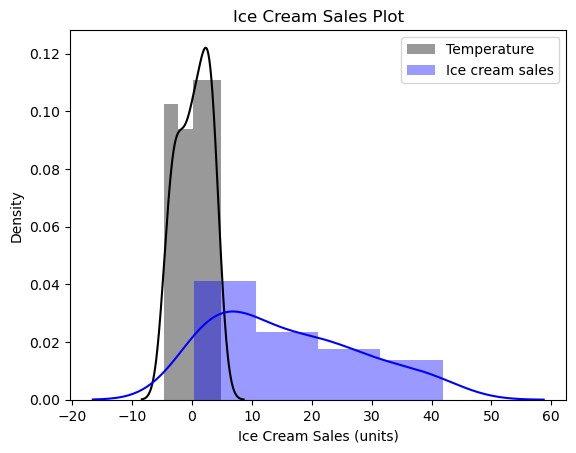

In [77]:
import seaborn as sns
plt.title('Ice Cream Sales Plot')
sns.distplot(data['Temperature (°C)'],color='black',label='Temperature')
sns.distplot(data['Ice Cream Sales (units)'],color='blue',label='Ice cream sales')
plt.legend()
plt.show()

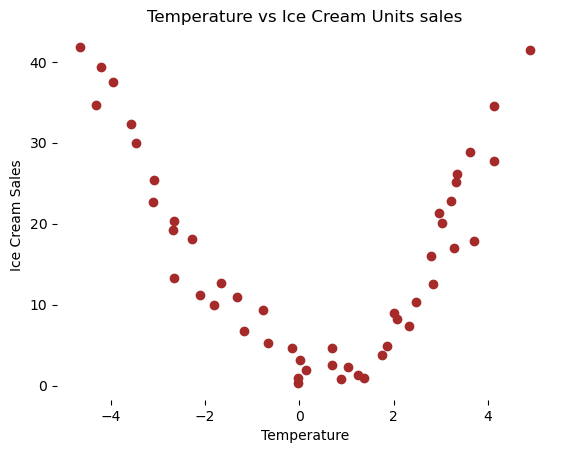

In [78]:
plt.scatter(data['Temperature (°C)'],data['Ice Cream Sales (units)'],color='brown')
plt.title('Temperature vs Ice Cream Units sales')
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Sales')
plt.box(False)
plt.show()
x = data['Temperature (°C)'].to_numpy().reshape(-1, 1)
y=data['Ice Cream Sales (units)']


In [79]:
# Splitting variables
X = data.iloc[:, 1:-1].values  # independent
y = data.iloc[:, -1].values  # dependent

In [80]:
# Train polynomial regression model on the whole dataset
pr = PolynomialFeatures(degree = 2)
x_poly = pr.fit_transform(x)
lr = LinearRegression()
lr.fit(x_poly, y)

LinearRegression()

In [82]:
y_pred_poly = lr.predict(x_poly)  # Polynomial Regression

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7192\406834585.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(x), max(x), 0.1)


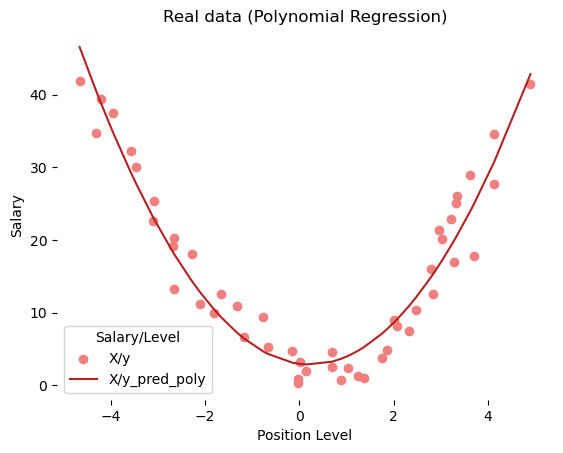

In [86]:
X_grid = np.arange(min(x), max(x), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'lightcoral')
plt.plot(x, y_pred_poly, color = 'firebrick')
plt.title('Real data (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend(['X/y', 'X/y_pred_poly'], title = 'Salary/Level', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [88]:
coefficients = lr.coef_
intercept = lr.intercept_
poly_eq = "Sales = {:.2f}".format(intercept)
for i in range(1, len(coefficients)):
    poly_eq += " + {:.2f}*Level^{}".format(coefficients[i], i)
poly_eq


In [92]:
poly_eq

'Sales = 2.95 + -0.82*Level^1 + 1.83*Level^2'

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate Errors for Polynomial Regression
mae_poly = mean_absolute_error(y, y_pred_poly)
mse_poly = mean_squared_error(y, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y, y_pred_poly)
print("Polynomial Regression Errors:")
print(f"  Mean Absolute Error (MAE): {mae_poly}")
print(f"  Mean Squared Error (MSE): {mse_poly}")
print(f"  Root Mean Squared Error (RMSE): {rmse_poly}")
print(f"  R-squared (R2): {r2_poly}")

Polynomial Regression Errors:
  Mean Absolute Error (MAE): 2.697154847054585
  Mean Squared Error (MSE): 10.00322059723016
  Root Mean Squared Error (RMSE): 3.1627868403087427
  R-squared (R2): 0.9321137090298401
